In [1]:
%reload_ext autoreload
%autoreload 2

import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import sys
sys.path.append('../../')

import funcs 
import load_data
import pandas as pd
from time import time
import matplotlib.pyplot as plt
# import warnings
import multiprocessing
from joblib import Parallel, delayed
import seaborn as sns
sns.set(font_scale=1.1, palette='colorblind', style='darkgrid', context='paper')

# warnings.filterwarnings('ignore')

%reload_ext load_data
%reload_ext funcs

2022-02-14 08:50:05.336995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-14 08:50:05.337032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-14 08:50:09.783228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-14 08:50:09.783299: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-14 08:50:09.783323: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (artinmajdi-chestxraypriv-4y4staznk5e): /proc/driver/nvidia/version does not exist
2022-02-14 08:50:09.783604: I tensorflow

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 1 Loading the Data </span>

In [2]:
dataset_dict = {1:'kr-vs-kp', 
                2:'mushroom',
                3:'sick',
                4:'spambase',
                5:'tic-tac-toe',
                6:'splice',
                8:'waveform',
                9:'biodeg',
                10:'horse-colic',
                11:'ionosphere',
                12:'vote'}

dataset = dataset_dict[4]

data, feature_columns = load_data.aim1_3_read_download_UCI_database(WHICH_DATASET=dataset, mode='read')

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 2 Estimated-weight vs Worker-strength </span>

In [17]:
aim1_3 = funcs.Aim1_3_Data_Analysis_Results(nlabelers_list=range(13), dataset=dataset)
df, df_stacked = aim1_3.worker_weight_strength_relation(seed=2, data=data, num_simulations=7, interpolation_pt_count=1000, feature_columns=feature_columns, num_labelers=13, low_dis=0.4, high_dis=1)

# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 3. Paper Figure </span>

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

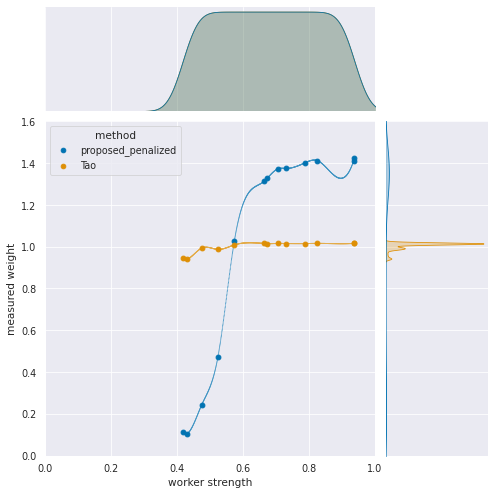

In [18]:
fig = plt.figure()

p = sns.jointplot(data=df_stacked, x="worker strength", y="measured weight", hue="method",  ylim=(0,1.6), xlim=(0,1), kind='scatter', joint_kws={"s": 1}, ratio=3, size=7, space=0.1)
p.ax_joint.plot(aim1_3.weight_strength_relation[ ['proposed_penalized', 'Tao'] ], 'o')

fig.savefig(f'Estimated-weight vs Worker-strength - Dataset {dataset} - via seaborn.jpg')


# <span style="color:orange; font-family:PT Sans Narrow; font-size:1em"> 4. Other Figure </span>

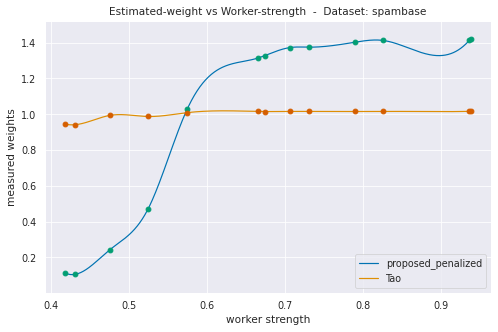

In [9]:
fig = plt.figure(figsize =(8,5))

aim1_3.plot_worker_weight_strength_relation(smooth=True, interpolation_pt_count=1000, legend={'loc':'lower right'},show_markers='all')

# fig.savefig(f'Estimated-weight vs Worker-strength - Dataset {dataset}.jpg')